## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# check data
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Checking the number of mice.
count_mice = combined_df['Mouse ID'].nunique()
count_mice

249

In [4]:
# check number of data records (includes header)
count_records = combined_df['Mouse ID'].count()
count_records

1893

In [5]:
# checking for duplicate data entries by Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID.
duplicate_entry = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
print("Duplicate Entries are:", duplicate_entry, sep='\n')

Duplicate Entries are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# reset index and remove old index column
clean_df = clean_df.reset_index(drop = True)
clean_df.tail(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4
1887,z969,Naftisol,Male,9,30,45,73.867845,4


In [13]:
# Checking the number of mice in the clean DataFrame.
count_mice = clean_df['Mouse ID'].nunique()
count_mice

249

In [14]:
# check number of data records (includes header)
count_records = clean_df['Mouse ID'].count()
count_records

1888

In [15]:
# get number and names of drugs in study
drugs_unique_num = clean_df['Drug Regimen'].nunique()
drugs_unique = clean_df['Drug Regimen'].unique()
print(drugs_unique_num)
print(drugs_unique)

10
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


## Summary Statistics

#### Statistics by Series 

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them
# all together at the end.

In [17]:
# create all the required Series

# create a Series of the mean tumor volume by Drug Regimen 
series_mean_vol = pd.Series(clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
#series_mean_vol

# create a Series of the median tumor volume by Drug Regimen 
series_med_vol = pd.Series(clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
#series_med_vol

# create a Series of the tumor volume variance by Drug Regimen 
series_var_vol = pd.Series(clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
#series_var_vol

# create a Series of the tumor volume standard deviation by Drug Regimen 
series_std_dev_vol = pd.Series(clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std())
#series_std_dev_vol

# create a Series of the tumor volume SEM by Drug Regimen 
series_sem_vol = pd.Series(clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())
#series_sem_vol

In [18]:
# place all of the data into a summary DataFrame and display
tumor_vol_summary1_df = pd.DataFrame({
                                    'Mean Volume': series_mean_vol,
                                    'Median Volume': series_med_vol,
                                    'Volume Variance': series_var_vol,
                                    'Volume Standard Deviation': series_std_dev_vol,
                                    'SEM': series_sem_vol
                                    })
tumor_vol_summary1_df

,Mean Volume,Median Volume,Volume Variance,Volume Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


#### Statistics by GroupBy function 

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

In [20]:
# use GroupBy and aggregate to create df in one step
# formula found on pandas.core.groupby.DataFrameGroupBy.agg webpage

tumor_vol_summary2_df = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
#tumor_vol_summary2_df.head()

# rename columns to match table above
tumor_vol_summary2_df = tumor_vol_summary2_df.rename(columns={'mean': 'Mean Volume', 'median': 'Median Volume', 'var': 'Volume Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

tumor_vol_summary2_df

,Mean Volume,Median Volume,Volume Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

#### Pandas Bar Chart

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout
# the course of the study using pandas. 

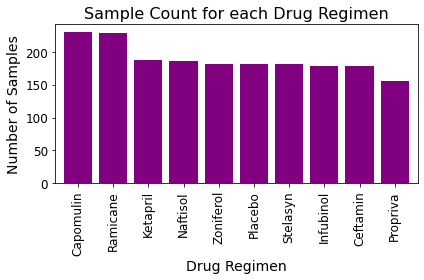

In [32]:
# get counts for each drug regimen
count_by_regimen = clean_df['Drug Regimen'].value_counts()

# create a bar chart 
count_by_regimen.plot.bar(color="purple", fontsize=12, width=0.8, legend=False)

# set the labels
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Samples", fontsize=14)
plt.title("Sample Count for each Drug Regimen", fontsize=16)
plt.tight_layout()

# save and plot the figure
plt.savefig("figures/summary_bar_chart1.png")
plt.show()

#### MatPlotLib Pyplot Bar Chart 

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout
# the course of the study using pyplot.

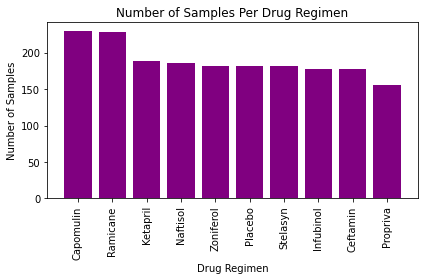

In [36]:
# get counts for each drug regimen
count_by_regimen = clean_df['Drug Regimen'].value_counts()

# make a bar chart
plt.figure(figsize=(6,4))
plt.bar(count_by_regimen.index.values, count_by_regimen.values, color='purple', align='center', width=0.8)

# give the chart a title, x label, and y label
plt.title("Number of Samples Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Samples")
plt.xticks(rotation='vertical')

# save and plot the figure
plt.tight_layout()
plt.savefig("figures/summary_bar_chart2.png")
plt.show()

#### Pandas Pie Chart 

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

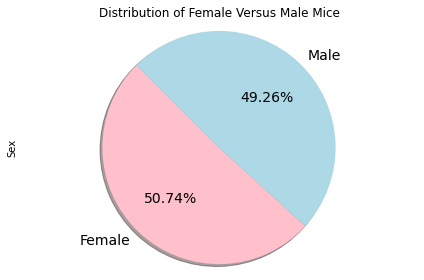

In [37]:
# count each sex of mice
sex_count = clean_df['Sex'].value_counts()

# create pie chart
sex_count.plot.pie(y = 'Sex', labels=['Female', 'Male'], colors=['pink', 'lightblue'],\
                    shadow=True, autopct='%.2f%%', fontsize=14, startangle=135,legend=False,\
                    title="Distribution of Female Versus Male Mice")

plt.axis("equal")

# save an image of the chart and display
plt.tight_layout()
plt.savefig("figures/sex_pie_chart1.png")
plt.show()

#### MatPlotLib Pyplot Pie Chart

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

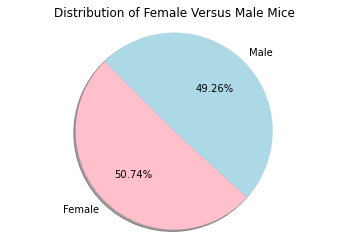

In [38]:
%matplotlib inline

# count each sex of mice
sex_count = clean_df['Sex'].value_counts()

# set chart parameters
labels = ["Female", "Male"]
colors = ["pink","lightblue"]

# use matplotlib to create a pie chart
plt.pie(sex_count.values, labels=labels, colors=colors, autopct="%.2f%%", shadow=True, startangle=135)

# set additional chart parameters
plt.axis("equal")
plt.title("Distribution of Female Versus Male Mice")

# save an image of the chart and display
plt.savefig("figures/sex_pie_chart2.png")
plt.show()

## Quartiles, Outliers and Boxplots

#### Data Preparation 

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"])['Timepoint'].max()

# reset index
last_timepoint = last_timepoint.reset_index()
last_timepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [61]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_max = last_timepoint.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
merged_max.tail()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3
248,z969,45,Naftisol,Male,9,30,73.867845,4


#### IRQ and Outlier Calculations

In [67]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_max.loc[merged_max["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    
    # perform quartile calculations
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile for {drug} is: {lowerq}")
    print(f"The upper quartile for {drug} is: {upperq}")
    print(f"The interquartile range for {drug} is: {iqr}")
    print(f"The the median for {drug} is: {quartiles[0.5]} ")
    
    # determine lower and upper bounds 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print("\n")

The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
The the median for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.


The lower quartile for Ramicane is: 31.56046955
The upper quartile for Ramicane is: 40.65900627
The interquartile range for Ramicane is: 9.098536719999998
The the median for Ramicane is: 36.56165229 
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.


The lower quartile for Infubinol is: 54.04860769
The upper quartile for Infubinol is: 65.52574285
The interquartile range for Infubinol is: 11.477135160000003
The the median for Infubinol is: 60.16518046 
Values below 36.83290494999999 for Infubinol could be outliers.
Values above 82.74144559000001 for Infubinol could be outliers.


The lowe

#### Box and Whisker Plot 

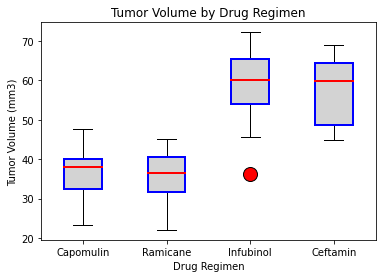

In [107]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
style = dict(markerfacecolor='red', markersize=14)
boxes = ax1.boxplot(tumor_vol, labels=regimens, flierprops=style, patch_artist=True,\
                    medianprops={'color':'red', 'linewidth':2})

for box in boxes['boxes']:
    
    # change box color
    box.set(color='blue', linewidth=2) 
    
    # change fill color
    box.set(facecolor='lightgray') 

# save an image of the chart and display
plt.savefig("figures/boxplot.png")
plt.show()

## Line and Scatter Plots

#### Line Plot 

In [47]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [56]:
# find all mice treated with Capomulin
capomulin_mice = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [57]:
# select a random capomulin mouse
sample_mouse = capomulin_mice.sample(1)
sample_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
310,j246,Capomulin,Female,21,21,0,45.0,0


In [58]:
# create dataframe with sample_mouse data
sample_mouse_data = capomulin_mice.loc[capomulin_mice['Mouse ID'] == sample_mouse.iloc[0,0], :]
sample_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
310,j246,Capomulin,Female,21,21,0,45.000000,0
311,j246,Capomulin,Female,21,21,5,45.641438,0
312,j246,Capomulin,Female,21,21,10,46.408361,0
313,j246,Capomulin,Female,21,21,15,43.312654,0
314,j246,Capomulin,Female,21,21,20,44.020370,0
315,j246,Capomulin,Female,21,21,25,44.555226,0
316,j246,Capomulin,Female,21,21,30,38.044082,1
317,j246,Capomulin,Female,21,21,35,38.753265,1


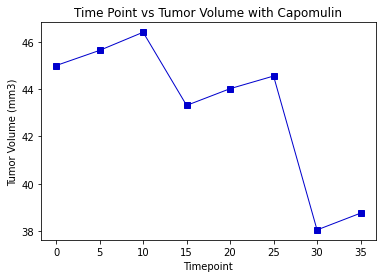

In [59]:
x_values = sample_mouse_data['Timepoint']
y_values = sample_mouse_data['Tumor Volume (mm3)']

# plot a line graph
plt.plot(x_values, y_values, marker='s', color='mediumblue', linewidth=1)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Time Point vs Tumor Volume with Capomulin')

# save and display the chart
plt.savefig("figures/line_plot.png")
plt.show()

#### Scatter Plot Setup

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
weight = capomulin_mice.groupby('Mouse ID')['Weight (g)']
weight

In [ ]:
# determine avg tumor vol each mouse
volume_df = capomulin_mice.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
volume_df.head(3)

In [ ]:
########## create new dataframe scatter_df

In [ ]:
# create tumor volume series
volume = volume_df['Tumor Volume (mm3)']
volume

#### Scatter Plot 

In [ ]:
x_values = scatter_df['weight']
y_values = scatter_df['volume']

# create scatter plot
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.grid()
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs. Mouse Weight")

# set x and y limits
#plt.xlim(0, x_limit)
#plt.ylim(0, 1)

# save and display the chart
plt.savefig("../figures/scatter_plot.png")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#### Correlation Coefficient 

In [ ]:
# calculate correlation 
x_values = scatter_df['weight']
y_values = scatter_df['volume']

correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

#### Linear Regression Model 

In [ ]:
# create scatter plot with linear regression equation and line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-22,35),fontsize=12,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.grid()

plt.savefig("../figures/correlation_plot.png")
plt.show()